In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import io #Used as buffer

In [4]:
path= Path(f'../../data/cluster_results')

In [5]:
def read_csv(f):
    df = pd.read_csv(f).mean()
    df['std'] = pd.read_csv(f).std().iloc[0] #remove this line to remove std from table

    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    df['freq'] = int(name[4:].split('n')[0])
    #df['method'] = f.name.split('_')[0]
    if 'noNN' in f.name:
        df['method'] = f.name.split('_')[0]       
    else:
        df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
    df['ns']=int(name[19:].split('n')[0])
    df['tw']=name[25:].split('nn')[0] 
    if df['tw']=='None':
       # df['bs']=int(name[34:].split('n')[0])
        df['epochs']=int(name[43:]) 
    else:
       # df['bs']=int(name[31:].split('n')[0])
        df['epochs']=int(name[40:][0])
    return df

measure_name=['mof','sr','arr','nfe','nn_time']
index_measure=0

In [6]:
m = measure_name[index_measure]

files = list(f for f in path.glob(f'exp*/*/freq1*nn_s*nn_tw*bs*/*{m}.csv') if 'NNnorm_Random' in f.name) #path.glob(f'exp*/*/freq1*nn_s*nn_tw*bs*/*{m}.csv')
files=[o for o in files if 'nn_s5' not in o.parent.name]
files=[o for o in files if 'nn_s2' not in o.parent.name]
df = pd.DataFrame([read_csv(f) for f in files])
# data = pd.pivot_table(df, index=['experiment','function'], columns='method', values=m) #,'freq' later for adding frequency experiment
data = pd.pivot_table(df, index=['experiment','function','freq','ns', 'tw','epochs'],columns='method' ) #,'tw', 'bs','epochs'
data.style.format("{:,.2f}")

In [7]:
final_data = data[m].copy()

for col in data[m].columns:
    final_data[col] = data[m][col].apply(lambda x: f'{x:,.2f} (±') + data['std'][col].apply(lambda x: f'{x:,.2f})')
final_data    

method                                                     NNnorm_Random
experiment function   freq ns tw   epochs                               
exp1       rastrigin  1    1  None 10                      20.28 (±1.67)
                           3  5    3                       15.31 (±2.46)
                           7  5    3                       15.95 (±0.40)
                           9  5    3                       16.00 (±0.45)
           rosenbrock 1    1  None 10              29,973.01 (±2,519.17)
                           3  5    3              16,466.18 (±14,321.27)
                           7  5    3                  4,687.04 (±144.47)
                           9  5    3                  4,411.41 (±188.47)
           sphere     1    1  None 10                       9.07 (±3.06)
                           3  5    3                        2.69 (±2.12)
                           7  5    3                        1.49 (±0.06)
                           9  5    3                        1.37 (±0.05)
exp2       rastrigin  1    1  None 10                       1.84 (±0.27)
                           3  5    3                        2.53 (±0.29)
                           7  5    3                        2.08 (±0.22)
                           9  5    3                        4.00 (±0.39)
           rosenbrock 1    1  None 10                     63.13 (±11.53)
                           3  5    3                      67.04 (±10.82)
                           7  5    3                       62.37 (±6.97)
                           9  5    3                     166.22 (±18.97)
           sphere     1    1  None 10                       0.18 (±0.02)
                           3  5    3                        0.10 (±0.02)
                           7  5    3                        0.09 (±0.00)
                           9  5    3                        0.08 (±0.00)
exp3       rastrigin  1    1  None 10                      16.10 (±3.30)
                           3  5    3                       13.35 (±3.65)
                           7  5    3                       16.87 (±4.21)
                           9  5    3                        6.32 (±1.65)
           rosenbrock 1    1  None 10                      23.10 (±3.56)
                           3  5    3                    749.30 (±169.31)
                           7  5    3                       22.41 (±3.15)
                           9  5    3                      82.09 (±10.88)
           sphere     1    1  None 10                       0.02 (±0.00)
                           3  5    3                        1.00 (±0.16)
                           7  5    3                        0.03 (±0.00)
                           9  5    3                        0.08 (±0.01)
exp4       rastrigin  1    1  None 10                      77.53 (±4.27)
                           3  5    3                       55.38 (±4.50)
                           7  5    3                       54.23 (±6.46)
                           9  5    3                       90.07 (±4.86)
           rosenbrock 1    1  None 10      14,030,366.77 (±2,734,519.36)
                           3  5    3        8,370,859.17 (±1,583,260.74)
                           7  5    3        7,052,964.36 (±1,460,442.76)
                           9  5    3       21,746,725.69 (±2,444,104.19)
           sphere     1    1  None 10                      52.50 (±7.08)
                           3  5    3                       38.49 (±3.65)
                           7  5    3                       33.87 (±4.05)
                           9  5    3                       80.01 (±3.56)

In [8]:
print(final_data.to_csv(float_format='%.2f'))

experiment,function,freq,ns,tw,epochs,NNnorm_Random
exp1,rastrigin,1,1,None,10,20.28 (±1.67)
exp1,rastrigin,1,3,5,3,15.31 (±2.46)
exp1,rastrigin,1,7,5,3,15.95 (±0.40)
exp1,rastrigin,1,9,5,3,16.00 (±0.45)
exp1,rosenbrock,1,1,None,10,"29,973.01 (±2,519.17)"
exp1,rosenbrock,1,3,5,3,"16,466.18 (±14,321.27)"
exp1,rosenbrock,1,7,5,3,"4,687.04 (±144.47)"
exp1,rosenbrock,1,9,5,3,"4,411.41 (±188.47)"
exp1,sphere,1,1,None,10,9.07 (±3.06)
exp1,sphere,1,3,5,3,2.69 (±2.12)
exp1,sphere,1,7,5,3,1.49 (±0.06)
exp1,sphere,1,9,5,3,1.37 (±0.05)
exp2,rastrigin,1,1,None,10,1.84 (±0.27)
exp2,rastrigin,1,3,5,3,2.53 (±0.29)
exp2,rastrigin,1,7,5,3,2.08 (±0.22)
exp2,rastrigin,1,9,5,3,4.00 (±0.39)
exp2,rosenbrock,1,1,None,10,63.13 (±11.53)
exp2,rosenbrock,1,3,5,3,67.04 (±10.82)
exp2,rosenbrock,1,7,5,3,62.37 (±6.97)
exp2,rosenbrock,1,9,5,3,166.22 (±18.97)
exp2,sphere,1,1,None,10,0.18 (±0.02)
exp2,sphere,1,3,5,3,0.10 (±0.02)
exp2,sphere,1,7,5,3,0.09 (±0.00)
exp2,sphere,1,9,5,3,0.08 (±0.00)
exp3,rastrigin,1,1,None,1

## Interactive Plots

In [9]:
import altair as alt
alt.renderers.enable('notebook')
# DataFrame we use for plots
d = data.reset_index()
d.columns = ['experiment', 'function', 'freq', 'ns' , 'tw','epochs', 'NNnorm', 'NNnorm_std']
d.head(2)
d1 = d.melt(['experiment','function','freq','ns'], value_vars=['NNnorm'],
            var_name='method', value_name='mof')
d2 = d.melt(['experiment','function','freq', 'ns'], value_vars=['NNnorm_std'],
            var_name='method', value_name='mof_std')
d2.method = d2.method.str.replace('_std', '')
d = d1.merge(d2)
#d.head()

In [10]:
test = d.query("experiment=='exp1'").copy()  # & freq==1"
mins = test.groupby('function')['mof'].min()
test['mof_norm'] = test['mof']
for k,v in mins.iteritems():
    test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
#test.head()

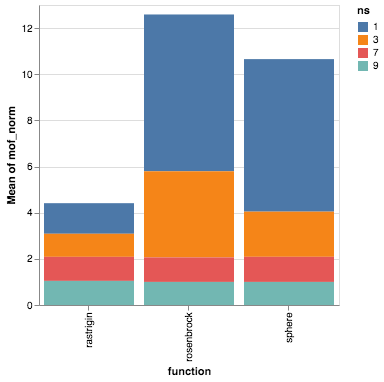

In [11]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['function'])
# Q -> quantity, numeric value
# O -> ordinal, category valeus in order
# N -> nominal, category
chart1 = base.mark_bar().encode(
    alt.X('function'),
    alt.Y('mean(mof_norm)'),
    alt.Color('ns:N'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)


chart1

In [12]:
def plot_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()

    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('function'),
        alt.Y('mean(mof_norm)'),#_norm
        alt.Color('ns:N'),
        alt.Tooltip(['mof_norm:Q','mof:Q','freq:Q','function:N']),
    ).properties(
        title=exp,
        width=300
    )
    return chart1

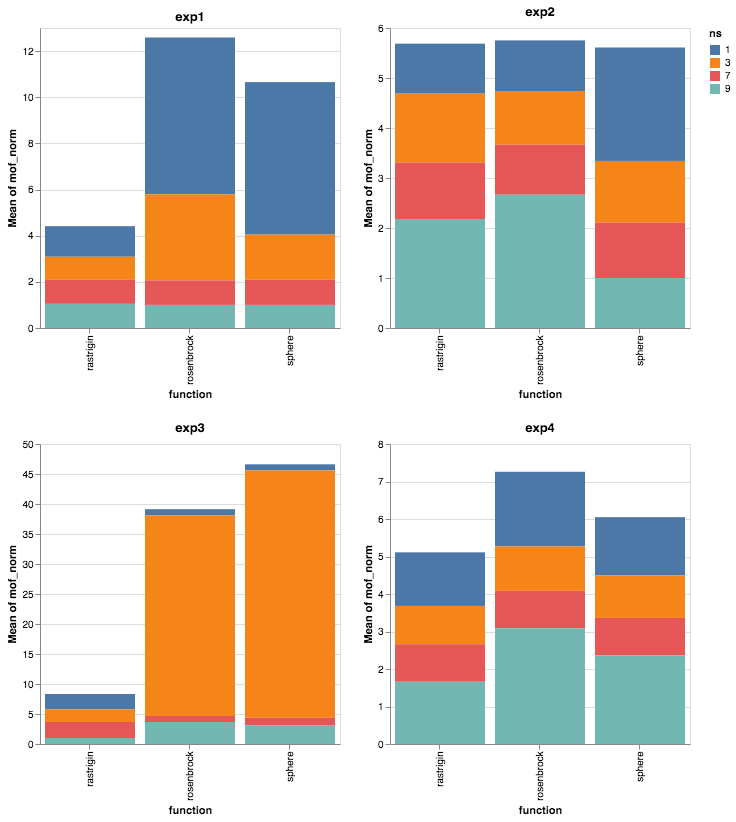

In [13]:
(plot_experiment('exp1')|plot_experiment('exp2'))&(plot_experiment('exp3')|plot_experiment('exp4'))

In [14]:
def plot2_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    test['function'] = test['function'].str.title()
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()

    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('ns:O', title='', axis=None),
        alt.Y('mean(mof_norm)', title=f'{exp} (MOF_norm)'), #mof_norm
        alt.Color('ns:N', legend=alt.Legend(title='k-best individuals:')),
        alt.Column('function', title='', sort='descending'),
        alt.Tooltip(['mof_norm:Q','mof:Q','freq:Q','function:N']),
    ).properties(
#         title=exp,
        width=50, height=150
    )
    return chart1

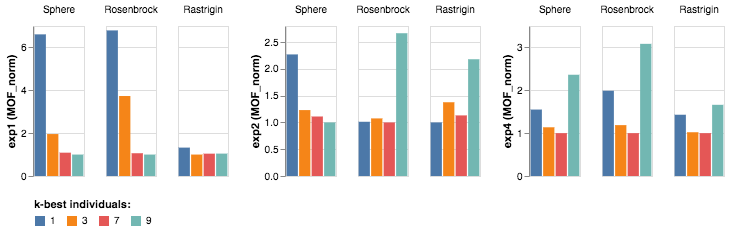

In [15]:
# samplesize=(plot2_experiment('exp1')|plot2_experiment('exp2'))&(plot2_experiment('exp3')|plot2_experiment('exp4'))
samplesize = plot2_experiment('exp1')|plot2_experiment('exp2')|plot2_experiment('exp4')

samplesize = samplesize.configure_legend(
    orient='bottom'
)
samplesize.save(str(path/'samplesize.png'), scale_factor=2.0)
samplesize

In [16]:
def plot3_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()
    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('ns:O', title='', axis=None),
        alt.Y('mean(mof_norm)', title='mof_norm'),
        alt.Color('ns:N',  legend=alt.Legend(title='Sample size')),
        alt.Tooltip(['mean(mof_norm)','freq']),
    ).properties(
        title=exp,
        width=70, height=100
    )
    return chart1

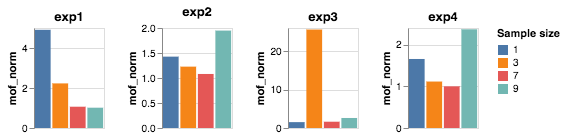

In [17]:
samplesize=(plot3_experiment('exp1')|plot3_experiment('exp2'))|(plot3_experiment('exp3')|plot3_experiment('exp4'))
samplesize